In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [53]:
data = pd.read_csv("/content/AirQualityUCI.csv",sep = ";", decimal=",") # all the values are separeted by ";", and a few had "," inpace of "."

In [54]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [55]:
data = data.drop(columns=["Unnamed: 15","Unnamed: 16"]) # you can drop it or use slicing method, data.iloc[:,:-2]

In [56]:
data.isnull().sum() # chekiing for null values

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [57]:
data.shape


(9471, 15)

In [58]:
data.dropna(inplace=True)# dropped the null values
print(data.shape)

(9357, 15)


In [59]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


We have to convert the date, time into their real format


In [61]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Here we dont have any missing value, but the catch is that -200 is also considered as missing values. which means they are also missing values

In [62]:
# Counting the number of times -200 comes in data
data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Handling the missing values**

In [63]:
# convert all -200 to NaN
# Replace all NaN with the mean of the column

data = data.replace(to_replace=-200, value=np.NaN)

In [64]:
data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [65]:
data.mean() # finding mean to replace it with NaN

<ipython-input-65-3c0ba6def347>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean() # finding mean to replace it with NaN


CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [66]:
# replacing the missing values with the mean value of the column
data = data.fillna(data.mean())

<ipython-input-66-d926e5b2f208>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [67]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [68]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Two task can be perfomed on this data:
1. Forecasting
2. Regression

In [69]:
data.corr()

<ipython-input-69-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.232979,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.240592,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751


#FB Prophet Model
only two inputs are given ie, date and Y(can be any column)

In [71]:
pip install prophet

In [100]:
from prophet import Prophet

In [75]:
# converting the data from DD/MM/YYY to YYYY/MM/DD

date_info = pd.to_datetime(data['Date'])
print(date_info)

0      2004-10-03
1      2004-10-03
2      2004-10-03
3      2004-10-03
4      2004-10-03
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


<ipython-input-75-172adef8a257>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date_info = pd.to_datetime(data['Date'])


In [77]:
# convert time format
time_info = data['Time']
time_info = time_info.apply(lambda x:x.replace('.',':')) # or use data['Time].str.replace('.',':')
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [82]:
print(type(time_info))
print(type(date_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [86]:
date_time = pd.concat([date_info,time_info], axis=1)


In [88]:
date_time.head()

,Date,Time
0,2004-10-03,18:00:00
1,2004-10-03,19:00:00
2,2004-10-03,20:00:00
3,2004-10-03,21:00:00
4,2004-10-03,22:00:00


In [91]:
# combining date and time

date_time['ds']=date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)

In [93]:
date_time.head()

,Date,Time,ds
0,2004-10-03,18:00:00,2004-10-03 18:00:00
1,2004-10-03,19:00:00,2004-10-03 19:00:00
2,2004-10-03,20:00:00,2004-10-03 20:00:00
3,2004-10-03,21:00:00,2004-10-03 21:00:00
4,2004-10-03,22:00:00,2004-10-03 22:00:00


In [94]:
# we have to convert ds from object to date format

data1 = pd.DataFrame()

In [95]:
data1['ds']=pd.to_datetime(date_time['ds'])

In [98]:
data1['y']=data['RH']

In [99]:
data1.head()

,ds,y
0,2004-10-03 18:00:00,48.9
1,2004-10-03 19:00:00,47.7
2,2004-10-03 20:00:00,54.0
3,2004-10-03 21:00:00,60.0
4,2004-10-03 22:00:00,59.6


In [102]:
# Training the Prophet model

model = Prophet()
model.fit(data1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfl94ru7/flysa_rc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfl94ru7/c4xzheay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1192', 'data', 'file=/tmp/tmplfl94ru7/flysa_rc.json', 'init=/tmp/tmplfl94ru7/c4xzheay.json', 'output', 'file=/tmp/tmplfl94ru7/prophet_modelf7gygs6h/prophet_model-20240310063603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [104]:
future = model.make_future_dataframe(periods=365,freq='H')
future.tail()

,ds
9717,2005-12-19 00:00:00
9718,2005-12-19 01:00:00
9719,2005-12-19 02:00:00
9720,2005-12-19 03:00:00
9721,2005-12-19 04:00:00


In [108]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-12-19 00:00:00,59.431287,42.955918,75.699848
9718,2005-12-19 01:00:00,60.810438,42.322397,78.719481
9719,2005-12-19 02:00:00,61.889115,44.421147,79.546711
9720,2005-12-19 03:00:00,62.677416,43.838988,80.638977
9721,2005-12-19 04:00:00,63.461402,45.542058,80.514081


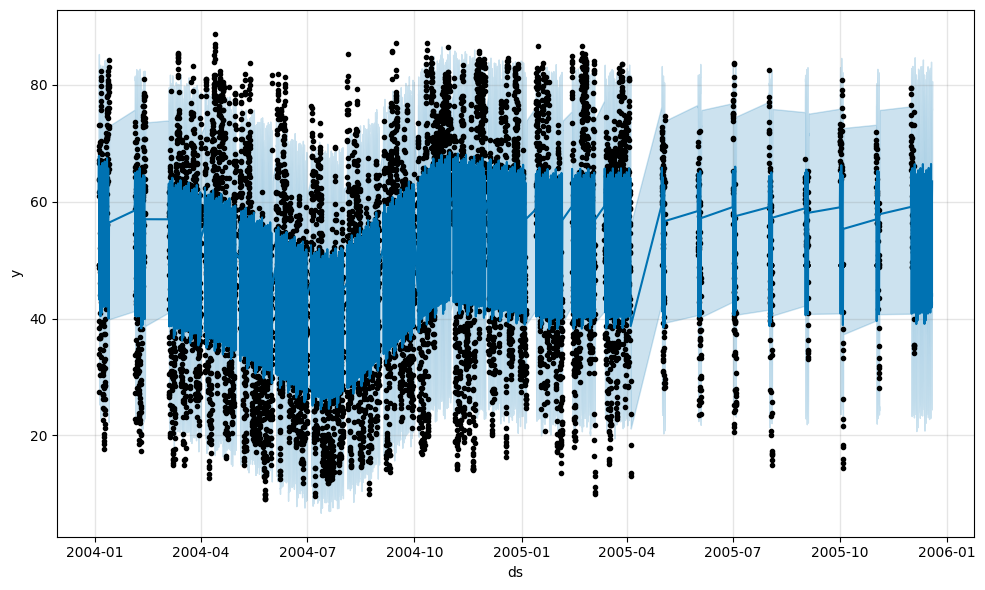

In [110]:
fig1 = model.plot(forecast)



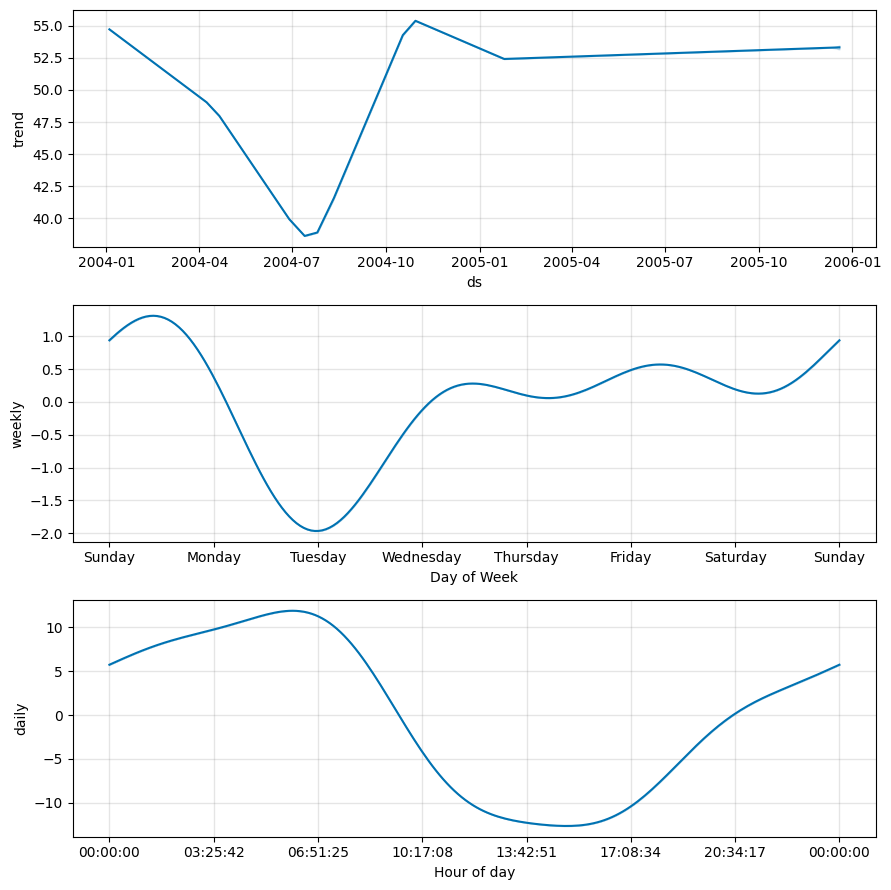

In [111]:
fig2 = model.plot_components(forecast)



In [112]:
pip install plotly

In [113]:
import plotly.graph_objects as go
import plotly.express as px


In [114]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)


In [115]:
plot_components_plotly(model, forecast)